In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

<h1>Cargar datos</h1>

In [2]:
dataframe_red = pd.read_csv("./dataset/winequality-red.csv",header=0,delimiter=";")
dataframe_white = pd.read_csv("./dataset/winequality-white.csv",header=0,delimiter=";")

In [3]:
dataframe=pd.concat([dataframe_red, dataframe_white], ignore_index=True)
print(dataframe)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4              0.70         0.00             1.9      0.076  \
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [4]:
x=dataframe.drop("quality", axis=1)
y=dataframe["quality"]


In [8]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
counts = dataframe['quality'].value_counts()
print(counts)

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [12]:
media=dataframe['quality'].mean()
print(media)

5.818377712790519


<h1>Kmeans</h1>

In [13]:
from sklearn.cluster import KMeans

In [34]:
num_clusters = 7
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

In [35]:
kmeans_model.fit(x)

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [36]:
print(kmeans_model.labels_)
print(kmeans_model.labels_.shape)

[0 0 0 ... 5 3 3]
(6497,)


In [37]:
print(y)
print(y.shape)

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64
(6497,)


In [38]:
predicciones=pd.DataFrame(columns=["real","prediccion"])

In [39]:
predicciones["real"]=y

In [40]:
predicciones["prediccion"]=kmeans_model.labels_

In [42]:
predicciones["prediccion"]=predicciones["prediccion"]+3

In [45]:
count_same_values = (predicciones['real'] == predicciones['prediccion']).sum()
print(count_same_values)

1030


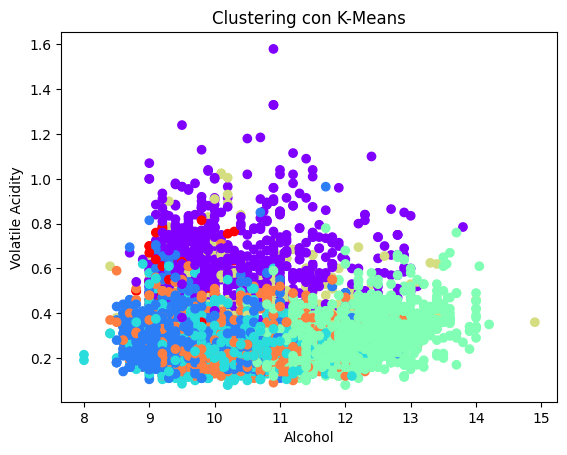

In [46]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['alcohol'], dataframe['volatile acidity'], c=kmeans_model.labels_, cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('Clustering con K-Means')
plt.show()

<h1>Validación cruzada con regresión lineal</h1>

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score

In [48]:
model = LinearRegression()

In [52]:
y_pred = cross_val_predict(model, x, y, cv=10)


[4.90581987 4.83543248 4.94938499 ... 5.417069   6.47189274 6.22140569]


In [51]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio: 0.5506936279620793
Coeficiente de determinación (R2): 0.2777384927589708


In [53]:
r2_scores = cross_val_score(model, x, y, cv=10)
average_r2 = r2_scores.mean()

In [54]:
print("Coeficiente de determinación promedio (R2) con validación cruzada:", average_r2)

Coeficiente de determinación promedio (R2) con validación cruzada: 0.25499437132397795


<h1>Validación cruzada con MLP</h1>

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [61]:
model = MLPClassifier(hidden_layer_sizes=(20, 5), max_iter=1000, random_state=42)


In [62]:
accuracy_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

In [63]:
average_accuracy = accuracy_scores.mean()

print("Precisión promedio con validación cruzada:", average_accuracy)

Precisión promedio con validación cruzada: 0.4842385266773258
